## Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans, HDBSCAN, MeanShift, AffinityPropagation, MiniBatchKMeans, AgglomerativeClustering, BisectingKMeans, DBSCAN, HDBSCAN, OPTICS
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics.cluster import adjusted_rand_score, adjusted_mutual_info_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../data/Final_students_data.csv")

df.head()

,Name,Year,Programming Languages,Certifications,Project Count,Extracurricular Activities,Career Interest,Bio,Cluster
0,Laila Mansour,2,Python; R; SQL,Data Science Professional Certificate (IBM),4,AI Club Mentor,Data Scientist,Laila has always been fascinated by the patter...,1
1,Omar Al-Hassan,4,Java; C++; HTML,CompTIA Security+,5,Cybersecurity Competition Participant,Cybersecurity Analyst,A forth-year student at Princess Sumaya Univer...,2
2,Rania Khoury,1,C; Python; JavaScript,Java Programming (Oracle),3,Peer Programming Tutor,Software Developer,Rania entered the University of Jordan's Compu...,0
3,Khaled Abbas,2,SQL; Python; R,Data Science Professional Certificate (IBM),4,Volunteer Tutor,Data Scientist,Khaled has a knack for translating data into m...,1
4,Nour Husseini,3,Python; Java; SQL,CEH,5,Tech Community Member,Cybersecurity Analyst,"In her Third year at Petra University, Nour is...",2


## Programming Engineering

In [3]:

def split_languages():
        courses = df["Programming Languages"].apply(lambda x: x.split("; "))
        return courses

languages = list({item for sublist in split_languages() for item in sublist})

for language in languages:
    df[language] = df["Programming Languages"].apply(lambda x: 1 if language in x else 0)



In [4]:
import prisma_ml as prisma

info = prisma.DatasetInformation(df)

info.dataframe_summary()

### Shape:

(257, 20)

### Columns and Metadata:

,Data Type,Null Values,Percentage of Nulls
Name,object,0,0.0
Year,int64,0,0.0
Programming Languages,object,0,0.0
Certifications,object,0,0.0
Project Count,int64,0,0.0
Extracurricular Activities,object,0,0.0
Career Interest,object,0,0.0
Bio,object,0,0.0
Cluster,int64,0,0.0
C++,int64,0,0.0


### Duplicated Rows:

,Duplicated Rows Count
Total,0


### Numerical Columns Statistical Summary:

,Year,Project Count,Cluster,C++,JavaScript,C,Java,HTML,R,Network Security,C#,CSS,Python,SQL
Mean,2.459144,4.000000,1.000000,0.260700,0.167315,0.342412,0.482490,0.038911,0.346304,0.015564,0.003891,0.003891,0.961089,0.782101
Median,2.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
Mode,2.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
Std Dev,0.935041,0.810093,0.810093,0.439873,0.373985,0.475443,0.500668,0.193759,0.476720,0.124023,0.062378,0.062378,0.193759,0.413624
Variance,0.874301,0.656250,0.656250,0.193489,0.139865,0.226046,0.250669,0.037543,0.227262,0.015382,0.003891,0.003891,0.037543,0.171085
Range,3.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Min,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Max,4.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Correlation Matrix:

,Year,Project Count,Cluster,C++,JavaScript,C,Java,HTML,R,Network Security,C#,CSS,Python,SQL
Year,1.000000,8.457437e-01,8.457437e-01,0.372650,-0.466295,0.330343,-0.216395,-0.077435,-6.014949e-02,0.207610,-0.030750,-0.030750,0.163679,-0.144309
Project Count,0.845744,1.000000e+00,1.000000e+00,0.427526,-0.554420,0.385399,-0.308195,-0.199092,5.053416e-18,0.155518,-0.077302,-0.077302,0.199092,-0.081605
Cluster,0.845744,1.000000e+00,1.000000e+00,0.427526,-0.554420,0.385399,-0.308195,-0.199092,-9.545341e-18,0.155518,-0.077302,-0.077302,0.199092,-0.081605
C++,0.372650,4.275258e-01,4.275258e-01,1.000000,-0.171206,0.822929,-0.165431,-0.073652,-4.322161e-01,0.211743,-0.037114,-0.037114,-0.063844,-0.244772
JavaScript,-0.466295,-5.544205e-01,-5.544205e-01,-0.171206,1.000000,-0.081806,0.464240,0.125433,-3.262629e-01,-0.056363,0.139429,0.139429,-0.179340,-0.041170
C,0.330343,3.853992e-01,3.853992e-01,0.822929,-0.081806,1.000000,0.025286,-0.060388,-5.252165e-01,0.174250,0.086613,0.086613,-0.194032,-0.493110
Java,-0.216395,-3.081947e-01,-3.081947e-01,-0.165431,0.464240,0.025286,1.000000,0.208385,-7.027897e-01,-0.121410,0.064728,0.064728,-0.208385,-0.376888
HTML,-0.077435,-1.990918e-01,-1.990918e-01,-0.073652,0.125433,-0.060388,0.208385,1.000000,-1.464508e-01,-0.025300,-0.012576,0.310619,-0.375709,-0.283721
R,-0.060149,5.053416e-18,-9.545341e-18,-0.432216,-0.326263,-0.525216,-0.702790,-0.146451,1.000000e+00,-0.091519,-0.045490,-0.045490,0.146451,0.324750
Network Security,0.207610,1.555184e-01,1.555184e-01,0.211743,-0.056363,0.174250,-0.121410,-0.025300,-9.151875e-02,1.000000,-0.007859,-0.007859,0.025300,-0.238218


### Correlation Matrix Heatmap:

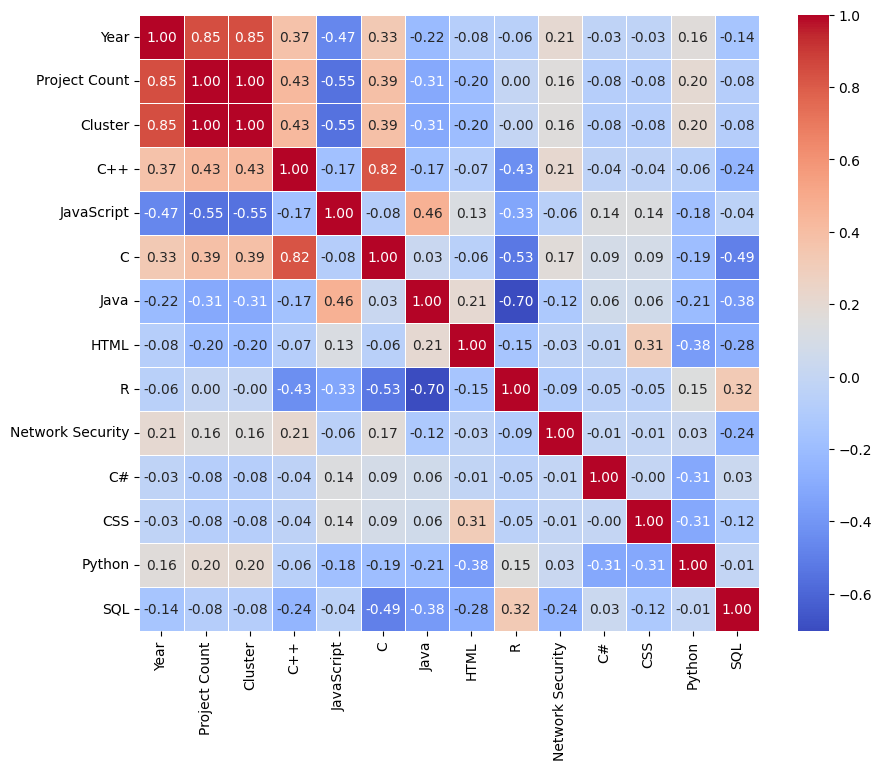

In [5]:
info.numerical_summary()

## Certification Engineering

In [6]:

sec_df = df.copy()

sec_df["Certifications"] = sec_df["Certifications"].apply(
    lambda x: "Professsional Certification" if ("Certification" in x or "Certified" in x or "CompTIA Network+" in x or "CEH" in x or "CompTIA Security+" in x or "Associate" in x or "Professional" in x or "Cryptography" in x) else x
)

sec_df["Certifications"] = sec_df["Certifications"].apply(
    lambda x: "Specialist Certification" if "Specialist" in x else x
)

sec_df["Certifications"] = sec_df["Certifications"].apply(
    lambda x: "Course Certificate" if ("Certificate" in x or "(Udemy)" in x or "(AWS)" in x or "Coursera" in x or "(Google)" in x) else x
)
sec_df["Certifications"] = sec_df["Certifications"].apply(
    lambda x: "Course Certificate" if ("Professsional Certification" not in x and "Specialist Certification" not in x) else x
)

df["Certifcation Type"] = sec_df["Certifications"].copy()

sec_df = df.copy()

sec_df["Certifications"] = sec_df["Certifications"].apply(
    lambda x: "Data Science" if ("Data Science" in x or "Certified" in x or "Analytics" in x or "Data Analysis" in x or "Data Engineering" in x or "Data Analyst" in x or "Data Visualization" in x or "Data Scientist" in x or "Big Data" in x or "Data Mining" in x) else x
)


sec_df["Certifications"] = sec_df["Certifications"].apply(
    lambda x: "Cybersecurity" if ("Cyber" in x or "Network" in x or "Security" in x or "Ethical Hacking" in x or "CEH" in x or "Cryptography" in x) else x
)

sec_df["Certifications"] = sec_df["Certifications"].apply(
    lambda x: "Software Development" if ("Developer" in x or "Development" in x or "Data Structures" in x or "Software" in x or "Database" in x or "Java" in x or "Programming" in x) else x
)

sec_df["Certifications"] = sec_df["Certifications"].apply(
    lambda x: "Web Development" if ("Web" in x or "Full Stack" in x or "Front-end" in x or "Back-end" in x) else x
)

sec_df["Certifications"] = sec_df["Certifications"].apply(
    lambda x: "Artificial Intelligence" if ("AI" in x or "Machine Learning" in x or "Deep Learning" in x) else x
)
sec_df["Certifications"] = sec_df["Certifications"].apply(
    lambda x: "Cloud" if ("Cloud" in x or "Azure" in x) else x
)

df["Certifcation Field"] = sec_df["Certifications"].copy()

## Extracurricular Engineering

In [7]:
sec_df["Extracurricular Activities"].value_counts()

Extracurricular Activities
Women in Cybersecurity              6
Cybersecurity Awareness Advocate    5
Data Science Society                5
Data Science Club Member            4
Cybersecurity Researcher            4
                                   ..
Network Security Intern             1
Startup Mentor                      1
Cybersecurity Team Member           1
AI Model Development Team           1
Young Cyber Enthusiasts             1
Name: count, Length: 191, dtype: int64

In [8]:
sec_df = df.copy()
sec_df["Extracurricular Activities"] = sec_df["Extracurricular Activities"].apply(
    lambda x: "Cloud" if ("Cloud" in x) else x
)

sec_df["Extracurricular Activities"] = sec_df["Extracurricular Activities"].apply(
    lambda x: "Tutor/Mentor" if ("Tutor" in x or "Educator" in x or "Research Assistant" in x or "Mentor" in x) else x
)

sec_df["Extracurricular Activities"] = sec_df["Extracurricular Activities"].apply(
    lambda x: "Cybersecurity" if ("Cybersecurity" in x or "Security" in x or "Cyber" in x or "Hacking" in x or "Hacker" in x) else x
)
sec_df["Extracurricular Activities"] = sec_df["Extracurricular Activities"].apply(
    lambda x: "Data Science" if ("Data Science" in x or "Data Visualization" in x or "Data" in x or "Analytics" in x or "Visualization" in x) else x
)
sec_df["Extracurricular Activities"] = sec_df["Extracurricular Activities"].apply(
    lambda x: "Artificial Intelligence" if ("AI" in x or "Machine Learning" in x) else x
)

sec_df["Extracurricular Activities"] = sec_df["Extracurricular Activities"].apply(
    lambda x: "Development" if ("Software Engineering / Computing" in x or "Software Development" in x or "App Development" in x or "App Developer" in x or "Developer" in x or "Development" in x or "Coding" in x or "Code" in x or "Dev" in x or "Computer Science" in x or "Computing" in x or "Contributor" in x or "Programmer" in x or "DB" in x or "Software Engineering" in x) else x
)

sec_df["Extracurricular Activities"] = sec_df["Extracurricular Activities"].apply(
    lambda x: "Competitions/Hackathons" if ("Hackathon" in x or "Competition" in x or "Contest" in x) else x
)

sec_df["Extracurricular Activities"] = sec_df["Extracurricular Activities"].apply(
    lambda x: "Tech Events/Initiatives" if ("Tech" in x) else x
)

sec_df["Extracurricular Activities"] = sec_df["Extracurricular Activities"].apply(
    lambda x: "Other" if ("Robotics" in x or "Student" in x or "Startup" in x or "Innovation" in x) else x
)

## Modelling

In [9]:
train = df.drop(["Bio","Cluster", "Programming Languages", "Name", "Certifications"], axis=1).copy()

train.head()

,Year,Project Count,Extracurricular Activities,Career Interest,C++,JavaScript,C,Java,HTML,R,Network Security,C#,CSS,Python,SQL,Certifcation Type,Certifcation Field
0,2,4,AI Club Mentor,Data Scientist,0,0,0,0,0,1,0,0,0,1,1,Professsional Certification,Data Science
1,4,5,Cybersecurity Competition Participant,Cybersecurity Analyst,1,0,1,1,1,0,0,0,0,0,0,Professsional Certification,Cybersecurity
2,1,3,Peer Programming Tutor,Software Developer,0,1,1,1,0,0,0,0,0,1,0,Course Certificate,Software Development
3,2,4,Volunteer Tutor,Data Scientist,0,0,0,0,0,1,0,0,0,1,1,Professsional Certification,Data Science
4,3,5,Tech Community Member,Cybersecurity Analyst,0,0,0,1,0,0,0,0,0,1,1,Professsional Certification,Cybersecurity


### Encoding

In [10]:
encoder = LabelEncoder()

columns_to_encode = ["Extracurricular Activities", "Career Interest", "Certifcation Type", "Certifcation Field"]

# Apply label encoding to each column
for column in columns_to_encode:
    train[column] = encoder.fit_transform(train[column])

### Scaling

In [11]:
scaler = StandardScaler()
scaled_train = scaler.fit_transform(train.to_numpy())
train = pd.DataFrame(scaled_train, columns=train.columns)

### PCA

Text(0, 0.5, 'cumulative explained variance')

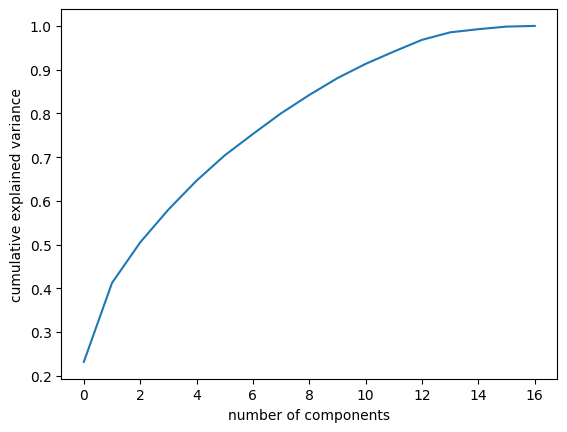

In [12]:
pca = PCA()
pca.fit(train)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [13]:
pca = PCA(n_components=13)
train_pca = pca.fit_transform(train)

#### Models

In [14]:
results_pca=[]

label_column = df["Cluster"]
kmeans = KMeans(n_clusters=3, verbose=3, n_init=1)
kmeans.fit(train_pca)
y_pred = kmeans.predict(train_pca)
sil_score = silhouette_score(train_pca, y_pred)
ch_score = calinski_harabasz_score(train_pca, y_pred)
db_score = davies_bouldin_score(train_pca, y_pred)
ari_score = adjusted_rand_score(label_column, y_pred)
ami_score = adjusted_mutual_info_score(label_column, y_pred)

results_pca.append(
    {
        "Model": "KMeans",
        "AMI Score": ami_score,
        "ARI Score": ari_score,
        "Silhouette Score": sil_score,
        "CH Score": ch_score,
        "DB Score": db_score,
    }
)

dbscan = DBSCAN(min_samples=2)
y_pred = dbscan.fit_predict(train_pca)

sil_score = silhouette_score(train_pca, y_pred)
ch_score = calinski_harabasz_score(train_pca, y_pred)
db_score = davies_bouldin_score(train_pca, y_pred)
ari_score = adjusted_rand_score(label_column, y_pred)
ami_score = adjusted_mutual_info_score(label_column, y_pred)

results_pca.append(
    {
        "Model": "DBSCAN",
        "AMI Score": ami_score,
        "ARI Score": ari_score,
        "Silhouette Score": sil_score,
        "CH Score": ch_score,
        "DB Score": db_score,
    }
)

dbscan = OPTICS(min_samples=2)
y_pred = dbscan.fit_predict(train_pca)

sil_score = silhouette_score(train_pca, y_pred)
ch_score = calinski_harabasz_score(train_pca, y_pred)
db_score = davies_bouldin_score(train_pca, y_pred)
ari_score = adjusted_rand_score(label_column, y_pred)
ami_score = adjusted_mutual_info_score(label_column, y_pred)

results_pca.append(
    {
        "Model": "OPTICS",
        "AMI Score": ami_score,
        "ARI Score": ari_score,
        "Silhouette Score": sil_score,
        "CH Score": ch_score,
        "DB Score": db_score,
    }
)

dbscan = HDBSCAN(min_samples=2)
y_pred = dbscan.fit_predict(train_pca)
sil_score = silhouette_score(train_pca, y_pred)
ch_score = calinski_harabasz_score(train_pca, y_pred)
db_score = davies_bouldin_score(train_pca, y_pred)
ari_score = adjusted_rand_score(label_column, y_pred)
ami_score = adjusted_mutual_info_score(label_column, y_pred)

results_pca.append(
    {
        "Model": "HDBSCAN",
        "AMI Score": ami_score,
        "ARI Score": ari_score,
        "Silhouette Score": sil_score,
        "CH Score": ch_score,
        "DB Score": db_score,
    }
)

results_pca = pd.DataFrame(results_pca)

Initialization complete
Iteration 0, inertia 3995.6437049431356.
Iteration 1, inertia 2893.2385046269483.
Iteration 2, inertia 2759.9186448772484.
Iteration 3, inertia 2754.875407981064.
Iteration 4, inertia 2750.9698261310004.
Iteration 5, inertia 2740.2538240613567.
Iteration 6, inertia 2728.41901930867.
Iteration 7, inertia 2728.169686952488.
Converged at iteration 7: strict convergence.


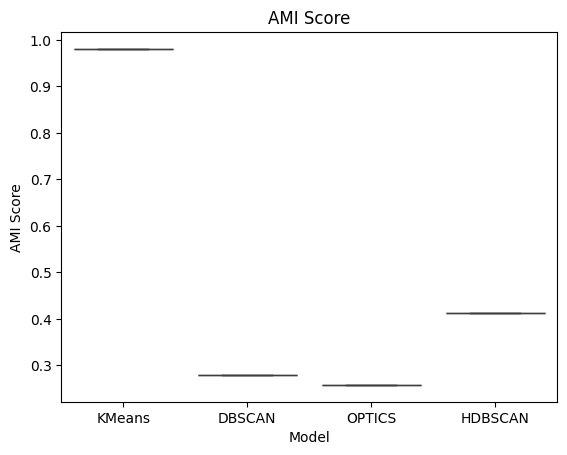

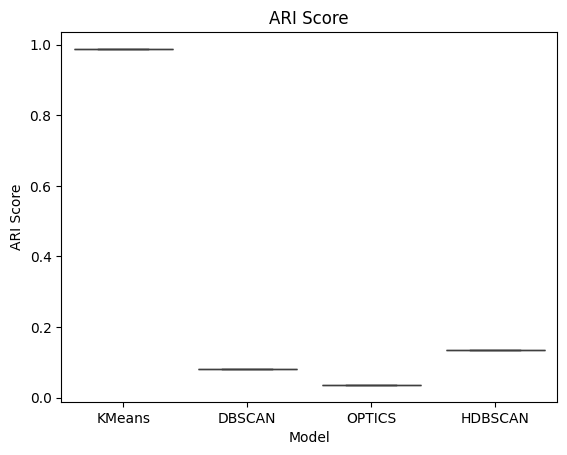

In [15]:
sns.boxplot(x="Model", y="AMI Score", data=results_pca)
plt.title("AMI Score")
plt.show()

sns.boxplot(x="Model", y="ARI Score", data=results_pca)
plt.title("ARI Score")
plt.show()

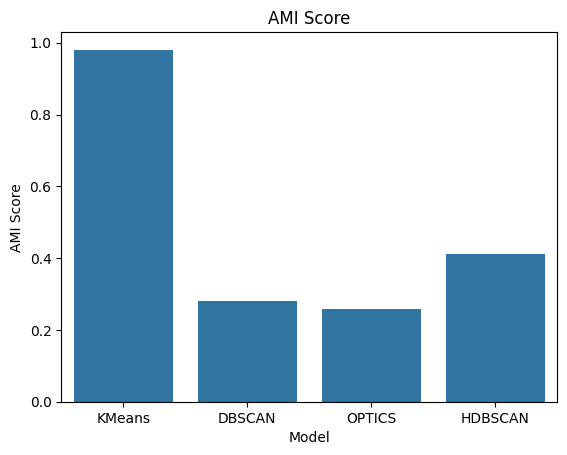

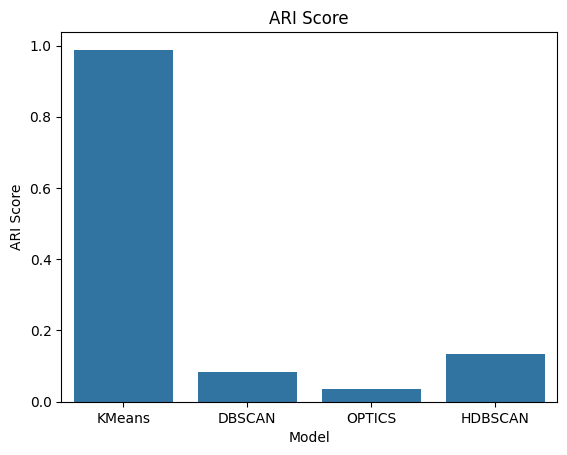

In [16]:
sns.barplot(x="Model", y="AMI Score", data=results_pca)
plt.title("AMI Score")
plt.show()

sns.barplot(x="Model", y="ARI Score", data=results_pca)
plt.title("ARI Score")
plt.show()

In [17]:
results_pca

,Model,AMI Score,ARI Score,Silhouette Score,CH Score,DB Score
0,KMeans,0.980515,0.988195,0.294817,69.910169,1.359723
1,DBSCAN,0.279275,0.082407,0.152967,3.196133,1.343614
2,OPTICS,0.258141,0.035954,0.374840,6.337016,1.323017
3,HDBSCAN,0.412200,0.134305,0.241642,13.332832,1.622870


### LDA

In [18]:
clf = LinearDiscriminantAnalysis()
train_pla = clf.fit_transform(train, label_column)

#### Models

In [19]:
results_pla=[]

label_column = df["Cluster"]
kmeans = KMeans(n_clusters=3, verbose=3, n_init=1)
kmeans.fit(train_pla)
y_pred = kmeans.predict(train_pla)
sil_score = silhouette_score(train_pla, y_pred)
ch_score = calinski_harabasz_score(train_pla, y_pred)
db_score = davies_bouldin_score(train_pla, y_pred)
ari_score = adjusted_rand_score(label_column, y_pred)
ami_score = adjusted_mutual_info_score(label_column, y_pred)

results_pla.append(
    {
        "Model": "KMeans",
        "AMI Score": ami_score,
        "ARI Score": ari_score,
        "Silhouette Score": sil_score,
        "CH Score": ch_score,
        "DB Score": db_score,
    }
)

dbscan = DBSCAN(min_samples=2)
y_pred = dbscan.fit_predict(train_pla)

sil_score = silhouette_score(train_pla, y_pred)
ch_score = calinski_harabasz_score(train_pla, y_pred)
db_score = davies_bouldin_score(train_pla, y_pred)
ari_score = adjusted_rand_score(label_column, y_pred)
ami_score = adjusted_mutual_info_score(label_column, y_pred)

results_pla.append(
    {
        "Model": "DBSCAN",
        "AMI Score": ami_score,
        "ARI Score": ari_score,
        "Silhouette Score": sil_score,
        "CH Score": ch_score,
        "DB Score": db_score,
    }
)

dbscan = OPTICS(min_samples=2)
y_pred = dbscan.fit_predict(train_pla)

sil_score = silhouette_score(train_pla, y_pred)
ch_score = calinski_harabasz_score(train_pla, y_pred)
db_score = davies_bouldin_score(train_pla, y_pred)
ari_score = adjusted_rand_score(label_column, y_pred)
ami_score = adjusted_mutual_info_score(label_column, y_pred)

results_pla.append(
    {
        "Model": "OPTICS",
        "AMI Score": ami_score,
        "ARI Score": ari_score,
        "Silhouette Score": sil_score,
        "CH Score": ch_score,
        "DB Score": db_score,
    }
)

dbscan = HDBSCAN(min_samples=2)
y_pred = dbscan.fit_predict(train_pla)
sil_score = silhouette_score(train_pla, y_pred)
ch_score = calinski_harabasz_score(train_pla, y_pred)
db_score = davies_bouldin_score(train_pla, y_pred)
ari_score = adjusted_rand_score(label_column, y_pred)
ami_score = adjusted_mutual_info_score(label_column, y_pred)

results_pla.append(
    {
        "Model": "HDBSCAN",
        "AMI Score": ami_score,
        "ARI Score": ari_score,
        "Silhouette Score": sil_score,
        "CH Score": ch_score,
        "DB Score": db_score,
    }
)

results_pla = pd.DataFrame(results_pla)

Initialization complete
Iteration 0, inertia 3.8433303302367695e-27.
Converged at iteration 0: center shift 1.9921875 within tolerance 3.7505906572254524e+25.


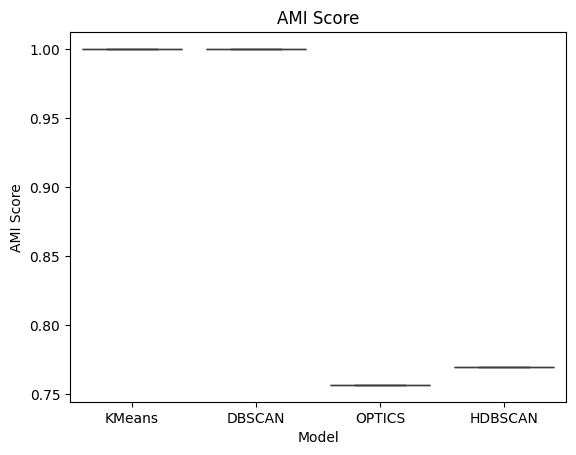

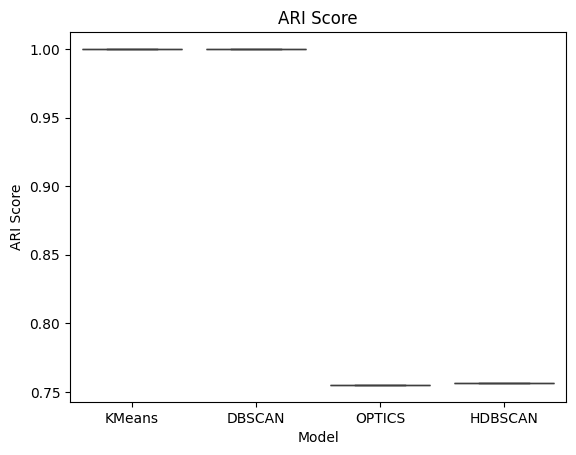

In [20]:
sns.boxplot(x="Model", y="AMI Score", data=results_pla)
plt.title("AMI Score")
plt.show()

sns.boxplot(x="Model", y="ARI Score", data=results_pla)
plt.title("ARI Score")
plt.show()

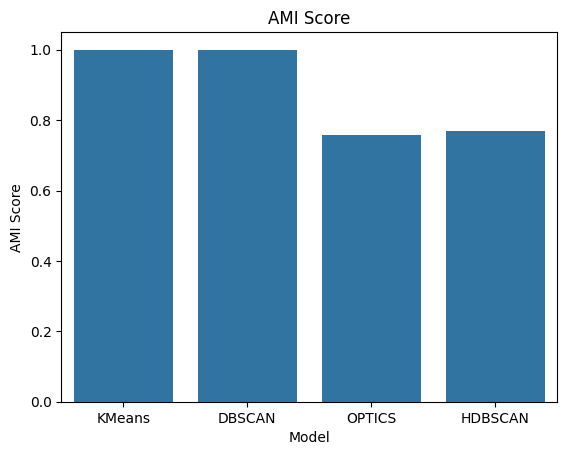

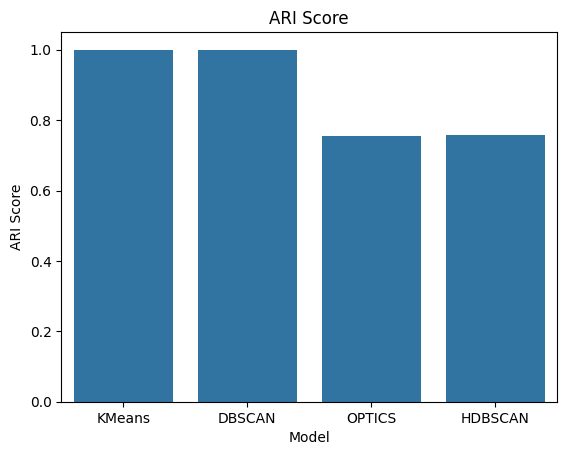

In [21]:
sns.barplot(x="Model", y="AMI Score", data=results_pla)
plt.title("AMI Score")
plt.show()

sns.barplot(x="Model", y="ARI Score", data=results_pla)
plt.title("ARI Score")
plt.show()